# <center>ADT dataset with trend and Seasonality Factors added</center>

### Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4956577/
'Each year, patients transferred between acute care hospitals constitute approximately 3.5% of all hospital inpatient admissions'

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Define the mode_of_arrival options
mode_of_arrival_options = ['Ambulance', 'Own Vehicle', 'Walk In', 'Other']

# Define the disposition options
disposition_options = ['HOME', 'ADMITTED', 'ELOPED', 'LEFT WITHOUT BEING SEEN', 'OTHER', 'LEFT AGAINST MEDICAL ADVICE', 'EXPIRED']

#Define the gender options
gender_options = ['M','F']

# Set a seed for reproducibility (optional)
random.seed(2020)

# List of values specifying the number of IDs to generate for each month
original_num_ids_list = [55, 41, 50, 44, 45, 55, 41, 40, 47, 53, 50, 52]

# Define the scaling factor
scaling_factor = 20

# Calculate the scaled number of IDs for each month
num_ids_list = [int(original_num_ids * scaling_factor) for original_num_ids in original_num_ids_list]

# Define the start and end years, including a leap year
start_year = 2015
end_year = 2020

# Create an empty list to store data
data = []

# Loop through each year
for year in range(start_year, end_year + 1):
    # Introduce a linear trend for the number of IDs
    trend_factor = (year - start_year + 1) * 2  # Adjust the trend factor as needed
    num_ids_list_with_trend = [int(num_ids * trend_factor) for num_ids in num_ids_list]

    # Determine if the current year is a leap year
    is_leap_year = (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

    # Calculate the number of patients with 'Transfer_date' for the current year
    total_patients = sum(num_ids_list_with_trend)
    num_transfer_patients = int(total_patients * 0.035)

    # Loop through each month
    for month, num_ids in enumerate(num_ids_list_with_trend, start=1):
        # Introduce seasonality by varying the number of IDs based on the month
        seasonality_factor = 1 + np.sin(2 * np.pi * (month - 1) / 12)  # Adjust the seasonality factor as needed
        num_ids = int(num_ids * seasonality_factor)

        # Determine the number of days in the current month
        if month == 2 and is_leap_year:
            last_day = 29  # February in a leap year
        else:
            last_day = 28  # Initialize with a safe value
            try:
                last_day = (datetime(year, month + 1, 1) - timedelta(days=1)).day
            except ValueError:
                pass

        # Generate random IDs, start dates, end dates, mode_of_arrival, and disposition for the current month
        for _ in range(num_ids):
            day = random.randint(1, last_day)  # Generate a random day within the month
            start_date = datetime(year, month, day)
            end_date = start_date + timedelta(days=random.randint(1, 30))  # Generate a random end date within 30 days
            id_value = random.randint(1000000, 99999999)  # Generate 8 digits Patient IDs
            arrival_mode = random.choice(mode_of_arrival_options)
            gender = random.choice(gender_options)

            # Determine if this patient should have a 'Transfer_date'
            if num_transfer_patients > 0:
                transfer_date = random.choice([start_date, end_date])
                num_transfer_patients -= 1
                disposition = 'TRANSFER'
            else:
                transfer_date = None
                disposition = random.choice(disposition_options)
            
            if transfer_date == start_date:
                transfer_type = 'Transfer Admissions/Incoming Transfers'
            elif transfer_date == end_date:
                transfer_type = 'Discharge for Transfer/Outgoing Transfers'
            else:
                transfer_type = ''

            data.append([start_date, end_date, transfer_date, id_value, arrival_mode, disposition, transfer_type, gender])

# Create a Pandas DataFrame from the data
master_data = pd.DataFrame(data, columns=["Admission Date", "Discharge Date", "Transfer Date", "Patient ID", "Mode of Arrival", "Disposition", "Transfer Type", "Gender"])

output_filename = 'ADT dataset.csv'

# Save the DataFrame to a CSV file
master_data.to_csv(output_filename, index=False)

print("DataFrame and CSV file saved successfully.")

# Print the first few rows of the DataFrame
print(master_data.head())

DataFrame and CSV file saved successfully.
  Admission Date Discharge Date Transfer Date  Patient ID Mode of Arrival  \
0     2015-01-20     2015-02-09    2015-02-09    24424196           Other   
1     2015-01-12     2015-02-11    2015-02-11    57279250     Own Vehicle   
2     2015-01-26     2015-02-03    2015-01-26    29130028           Other   
3     2015-01-16     2015-01-31    2015-01-31    15090499     Own Vehicle   
4     2015-01-26     2015-01-28    2015-01-26    60426956       Ambulance   

  Disposition                              Transfer Type Gender  
0    TRANSFER  Discharge for Transfer/Outgoing Transfers      F  
1    TRANSFER  Discharge for Transfer/Outgoing Transfers      M  
2    TRANSFER     Transfer Admissions/Incoming Transfers      M  
3    TRANSFER  Discharge for Transfer/Outgoing Transfers      F  
4    TRANSFER     Transfer Admissions/Incoming Transfers      F  


In [2]:
# Admissions Count
Admissions_Daily_counts = master_data.groupby([master_data["Admission Date"].dt.year.rename("Year"), master_data["Admission Date"].dt.month.rename("Month"), master_data["Admission Date"].dt.day.rename("Day")])["Patient ID"].count().reset_index()
Admissions_Daily_counts.columns = ["Year", "Month", "Day", "Patient ID Count"]
print('Admissions- Daily Count:\n',Admissions_Daily_counts.head())

Admissions_Monthly_counts = master_data.groupby([master_data["Admission Date"].dt.year.rename("Year"), master_data["Admission Date"].dt.month.rename("Month")])["Patient ID"].count().reset_index()
Admissions_Monthly_counts.columns = ["Year", "Month", "Patient ID Count"]
print('\nAdmissions- Monthly Count:\n',Admissions_Monthly_counts.head())

Admissions_Yearly_counts = master_data.groupby([master_data["Admission Date"].dt.year.rename("Year")])["Patient ID"].count().reset_index()
Admissions_Yearly_counts.columns = ["Year", "Patient ID Count"]
print('\nAdmissions- Yearly Count:\n',Admissions_Yearly_counts.head())

Admissions- Daily Count:
    Year  Month  Day  Patient ID Count
0  2015      1    1                64
1  2015      1    2                83
2  2015      1    3                66
3  2015      1    4                75
4  2015      1    5                61

Admissions- Monthly Count:
    Year  Month  Patient ID Count
0  2015      1              2200
1  2015      2              2460
2  2015      3              3732
3  2015      4              3520
4  2015      5              3358

Admissions- Yearly Count:
    Year  Patient ID Count
0  2015             22567
1  2016             45138
2  2017             67709
3  2018             90280
4  2019            112851


ADF Statistic: -2.3027150123736706
p-value: 0.17109382116077315
Critical Values:
   1%: -3.433648628001351
   5%: -2.8629971502062155
   10%: -2.5675457254979093


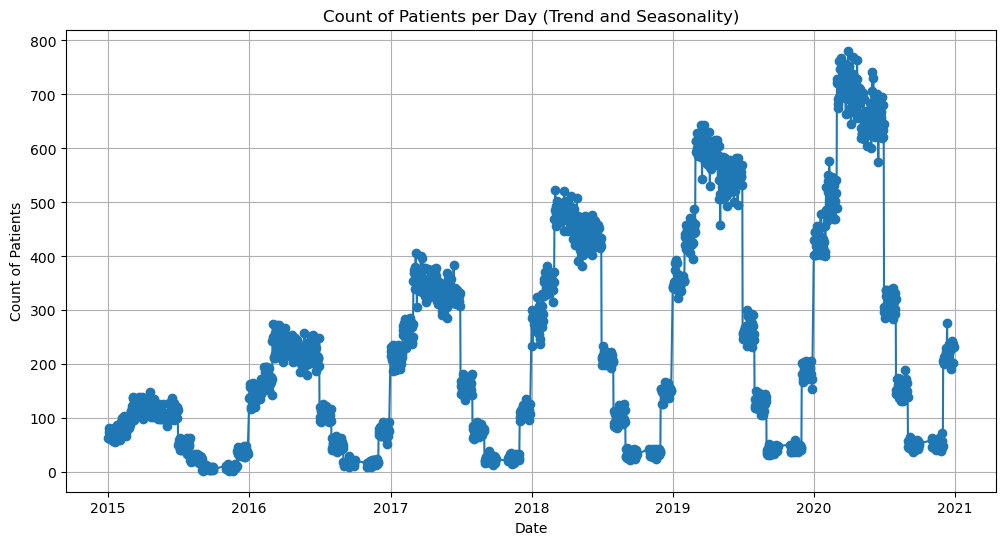

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


# Group the data by "Admission Date" and get the count of patients for each day
daily_counts = master_data.groupby(master_data['Admission Date'].dt.date)['Patient ID'].count()

# Perform the ADF test
result = adfuller(daily_counts)

# Extract and print the ADF test results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Create a line graph to visualize the trend and seasonality
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-')

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Count of Patients")
plt.title("Count of Patients per Day (Trend and Seasonality)")
plt.grid(True)

# Show the plot
plt.show()


In [4]:
# Discharges Count
Discharges_Daily_counts = master_data.groupby([master_data["Discharge Date"].dt.year.rename("Year"), master_data["Discharge Date"].dt.month.rename("Month"), master_data["Discharge Date"].dt.day.rename("Day")])["Patient ID"].count().reset_index()
Discharges_Daily_counts.columns = ["Year", "Month", "Day", "Patient ID Count"]
print('Discharges- Daily Count:\n',Discharges_Daily_counts.head())

Discharges_Monthly_counts = master_data.groupby([master_data["Discharge Date"].dt.year.rename("Year"), master_data["Discharge Date"].dt.month.rename("Month")])["Patient ID"].count().reset_index()
Discharges_Monthly_counts.columns = ["Year", "Month", "Patient ID Count"]
print('\nDischarges- Monthly Count:\n',Discharges_Monthly_counts.head())

Discharges_Yearly_counts = master_data.groupby([master_data["Discharge Date"].dt.year.rename("Year")])["Patient ID"].count().reset_index()
Discharges_Yearly_counts.columns = ["Year", "Patient ID Count"]
print('\nDischarges- Yearly Count:\n',Discharges_Yearly_counts.head())

Discharges- Daily Count:
    Year  Month  Day  Patient ID Count
0  2015      1    2                 4
1  2015      1    3                 2
2  2015      1    4                 5
3  2015      1    5                 5
4  2015      1    6                10

Discharges- Monthly Count:
    Year  Month  Patient ID Count
0  2015      1              1101
1  2015      2              2228
2  2015      3              3182
3  2015      4              3613
4  2015      5              3526

Discharges- Yearly Count:
    Year  Patient ID Count
0  2015             22089
1  2016             44682
2  2017             67278
3  2018             89764
4  2019            112385


ADF Statistic: -4.121541598108994
p-value: 0.0008920940484346163
Critical Values:
   1%: -3.433372653139527
   5%: -2.8628753016111688
   10%: -2.567480848042739


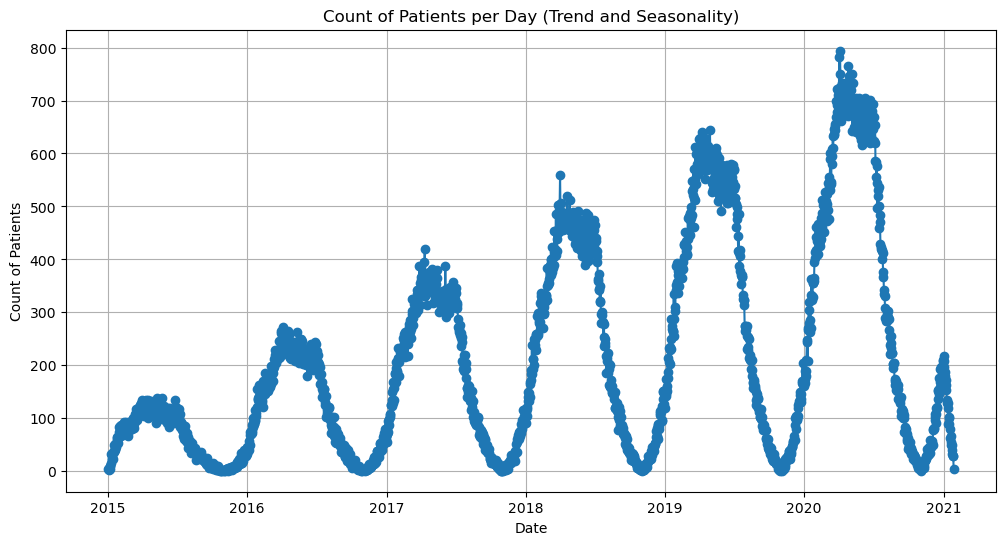

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


# Group the data by "Admission Date" and get the count of patients for each day
daily_counts = master_data.groupby(master_data['Discharge Date'].dt.date)['Patient ID'].count()

# Perform the ADF test
result = adfuller(daily_counts)

# Extract and print the ADF test results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Create a line graph to visualize the trend and seasonality
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-')

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Count of Patients")
plt.title("Count of Patients per Day (Trend and Seasonality)")
plt.grid(True)

# Show the plot
plt.show()


In [6]:
# Transfers Count
Transfers_Daily_counts = master_data.groupby([master_data["Transfer Date"].dt.year.rename("Year"), master_data["Transfer Date"].dt.month.rename("Month"), master_data["Transfer Date"].dt.day.rename("Day")])["Patient ID"].count().reset_index()
Transfers_Daily_counts.columns = ["Year", "Month", "Day", "Patient ID Count"]
print('Discharges- Daily Count:\n',Discharges_Daily_counts.head())

Transfers_Monthly_counts = master_data.groupby([master_data["Transfer Date"].dt.year.rename("Year"), master_data["Transfer Date"].dt.month.rename("Month")])["Patient ID"].count().reset_index()
Transfers_Monthly_counts.columns = ["Year", "Month", "Patient ID Count"]
print('\nTransfers- Monthly Count:\n',Transfers_Monthly_counts.head())

Transfers_Yearly_counts = master_data.groupby([master_data["Transfer Date"].dt.year.rename("Year")])["Patient ID"].count().reset_index()
Transfers_Yearly_counts.columns = ["Year", "Patient ID Count"]
print('\nTransfers- Yearly Count:\n',Transfers_Yearly_counts.head())

Discharges- Daily Count:
    Year  Month  Day  Patient ID Count
0  2015      1    2                 4
1  2015      1    3                 2
2  2015      1    4                 5
3  2015      1    5                 5
4  2015      1    6                10

Transfers- Monthly Count:
      Year  Month  Patient ID Count
0  2015.0    1.0               599
1  2015.0    2.0               202
2  2015.0    3.0                 1
3  2016.0    1.0              1203
4  2016.0    2.0               400

Transfers- Yearly Count:
      Year  Patient ID Count
0  2015.0               802
1  2016.0              1604
2  2017.0              2406
3  2018.0              3208
4  2019.0              4011


ADF Statistic: -2.7818940842462534
p-value: 0.060906975148503247
Critical Values:
   1%: -3.448544133483233
   5%: -2.8695574079525565
   10%: -2.5710411593052713


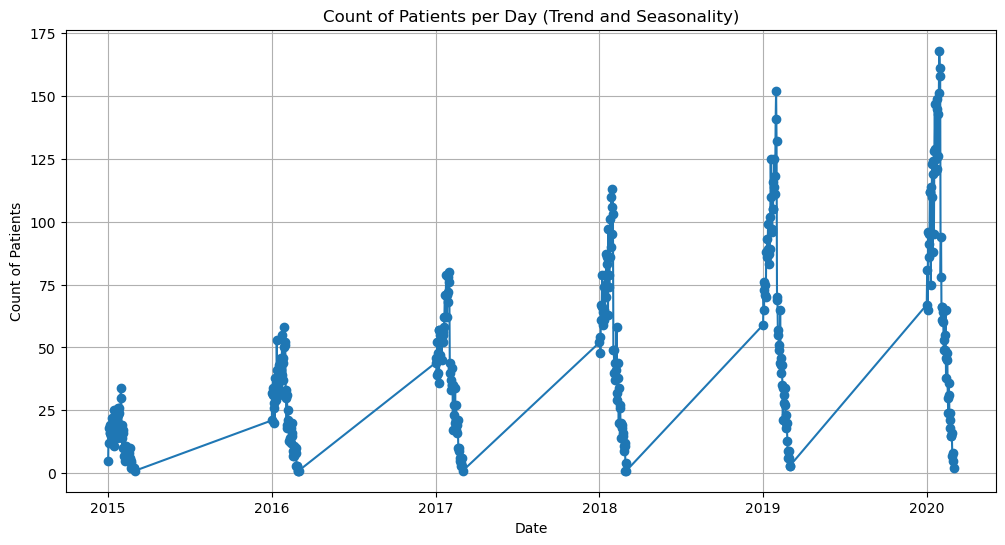

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


# Group the data by "Admission Date" and get the count of patients for each day
daily_counts = master_data.groupby(master_data['Transfer Date'].dt.date)['Patient ID'].count()

# Perform the ADF test
result = adfuller(daily_counts)

# Extract and print the ADF test results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Create a line graph to visualize the trend and seasonality
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-')

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Count of Patients")
plt.title("Count of Patients per Day (Trend and Seasonality)")
plt.grid(True)

# Show the plot
plt.show()

In [8]:
round((Transfers_Yearly_counts['Patient ID Count']/Admissions_Yearly_counts['Patient ID Count'])*100,2)

0    3.55
1    3.55
2    3.55
3    3.55
4    3.55
5    3.55
Name: Patient ID Count, dtype: float64

In [27]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as pl

# Extract the "Admission Date" and "Patient ID" columns
data = master_data[['Admission Date', 'Patient ID']]

data['year_admission_date']=data['Admission Date'].dt.strftime('%Y').astype(int)
data['month_admission_date']=data['Admission Date'].dt.strftime('%m').astype(int)
data[['year_admission_date','month_admission_date']]

C:\Users\krishika.R\AppData\Local\Temp\ipykernel_18320\4186736686.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_admission_date']=data['Admission Date'].dt.strftime('%Y').astype(int)
C:\Users\krishika.R\AppData\Local\Temp\ipykernel_18320\4186736686.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_admission_date']=data['Admission Date'].dt.strftime('%m').astype(int)


,year_admission_date,month_admission_date
0,2015,1
1,2015,1
2,2015,1
3,2015,1
4,2015,1
...,...,...
473962,2020,12
473963,2020,12
473964,2020,12
473965,2020,12


In [12]:
# ALl Data
data_X = data
data_X = data_X.groupby('Admission Date')['Patient ID'].count().reset_index()
data_X.columns = ['Admission Date', 'Patient Count']
data_X.head()

# Train dataset with 5 years data: 2015, 2016, 2017, 2018 & 2019 
train_data = data[(data['year_admission_date'] >= 2015) & (data['year_admission_date'] <= 2019)]
print(train_data.groupby('year_admission_date')['Patient ID'].count())
train_dataset = train_data.groupby('Admission Date')['Patient ID'].count().reset_index()
train_dataset.columns = ['Admission Date', 'Patient Count']
train_dataset.head()

# Validation dataset with 6 months: 2020-01-01 to '2020-06-30'
validation_data = data[(data['year_admission_date'] == 2020) & (data['month_admission_date'] <= 6)]
print(validation_data.groupby('month_admission_date')['Patient ID'].count())
validation_dataset = (validation_data.groupby('Admission Date')['Patient ID'].count()).reset_index()
validation_dataset.columns = ['Admission Date', 'Patient Count']
validation_dataset.head()

# Test dataset with 6 months: 2020-07-01 to '2020-12-31'
test_data = data[data['year_admission_date'] >= 2020 & (data['month_admission_date'] > 6)]
print(test_data.groupby('year_admission_date')['Patient ID'].count())
test_dataset = test_data.groupby('Admission Date')['Patient ID'].count().reset_index()
test_dataset.columns = ['Admissions Date','Patient Count']
test_dataset.head()

year_admission_date
2015     22567
2016     45138
2017     67709
2018     90280
2019    112851
Name: Patient ID, dtype: int64
month_admission_date
1    13200
2    14760
3    22392
4    21120
5    20153
6    19800
Name: Patient ID, dtype: int64
year_admission_date
2015     22567
2016     45138
2017     67709
2018     90280
2019    112851
2020    135422
Name: Patient ID, dtype: int64


,Admissions Date,Patient Count
0,2015-01-01,64
1,2015-01-02,83
2,2015-01-03,66
3,2015-01-04,75
4,2015-01-05,61


In [13]:
# Perform the ADF test
result = adfuller(train_dataset['Patient Count'])
adf_statistic = result[0]
p_value = result[1]

# Print ADF test results
print("ADF Statistic:", adf_statistic)
print("P-Value:", p_value)

ADF Statistic: -2.1298362856207085
P-Value: 0.23268772142684446


In [14]:
best_mse = float('inf')
best_order = None

for p in range(3):
    for d in range(2):
        for q in range(3):
            order = (p, d, q)
            model = SARIMAX(train_dataset['Patient Count'], order=order)
            model_fit = model.fit(disp=0)
            predictions = model_fit.predict(start=len(train_dataset['Patient Count']), end=len(train_dataset['Patient Count']) + len(validation_dataset['Patient Count']) - 1)
            mse = mean_squared_error(validation_dataset['Patient Count'], predictions)
            if mse < best_mse:
                best_mse = mse
                best_order = order

print("Best AIC:", best_mse)
print("Best Order (p, d, q):", best_order)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best AIC: 215474.57329540802
Best Order (p, d, q): (0, 1, 1)


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the MAPE function
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Fit ARIMA model to the training dataset
order = (0,1,1)  
model = SARIMAX(train_dataset['Patient Count'], order=order,seasonal_order = (1,1,1,12))
model_fit = model.fit(disp=0)

# Make predictions on the validation dataset
validation_predictions = model_fit.predict(start=len(train_dataset['Patient Count']), end=len(train_dataset['Patient Count']) + len(validation_dataset['Patient Count']) - 1)

# Calculate performance metrics for the validation set
mse = mean_squared_error(validation_dataset['Patient Count'], validation_predictions)
mae = mean_absolute_error(validation_dataset['Patient Count'], validation_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(validation_dataset['Patient Count'], validation_predictions)
mape = mean_absolute_percentage_error(validation_dataset['Patient Count'], validation_predictions)

print("Validation MSE:", mse)
print("Validation MAE:", mae)
print("Validation RMSE:", rmse)
print("Validation R-squared:", r2)
print("Validation MAPE:", mape)

Validation MSE: 209353.6041475003
Validation MAE: 444.23951122878873
Validation RMSE: 457.5517502397956
Validation R-squared: -15.813771403059611
Validation MAPE: 71.55011439291599


## Differenced dataset

In [28]:
import pandas as pd

# ALl Data
data_X = data
data_X = data_X.groupby('Admission Date')['Patient ID'].count().reset_index()
data_X.columns = ['Admission Date', 'Patient Count']
data_X.head()

# Train dataset with 5 years data: 2015, 2016, 2017, 2018 & 2019
train_data = data[(data['year_admission_date'] >= 2015) & (data['year_admission_date'] <= 2019)]
print(train_data.groupby('year_admission_date')['Patient ID'].count())

# Stationarize the train dataset using differencing
train_dataset_decomposed = train_data.groupby('Admission Date')['Patient ID'].count().reset_index()
train_dataset_decomposed.columns = ['Admission Date', 'Patient Count']

# Perform differencing to make the data stationary
train_dataset_decomposed['Patient Count'] = train_dataset['Patient Count'].diff()
train_dataset_decomposed = train_dataset_decomposed.dropna()  # Drop the first row with NaN value

train_dataset_decomposed.head()


year_admission_date
2015     22567
2016     45138
2017     67709
2018     90280
2019    112851
Name: Patient ID, dtype: int64


,Admission Date,Patient Count
2,2015-01-03,-36.0
3,2015-01-04,26.0
4,2015-01-05,-23.0
5,2015-01-06,20.0
6,2015-01-07,-9.0


In [29]:
daily_counts = train_dataset_decomposed
daily_counts.head()

,Admission Date,Patient Count
2,2015-01-03,-36.0
3,2015-01-04,26.0
4,2015-01-05,-23.0
5,2015-01-06,20.0
6,2015-01-07,-9.0


ADF Statistic: -39.40409284489882
p-value: 0.0
Critical Values: {'1%': -3.433648628001351, '5%': -2.8629971502062155, '10%': -2.5675457254979093}


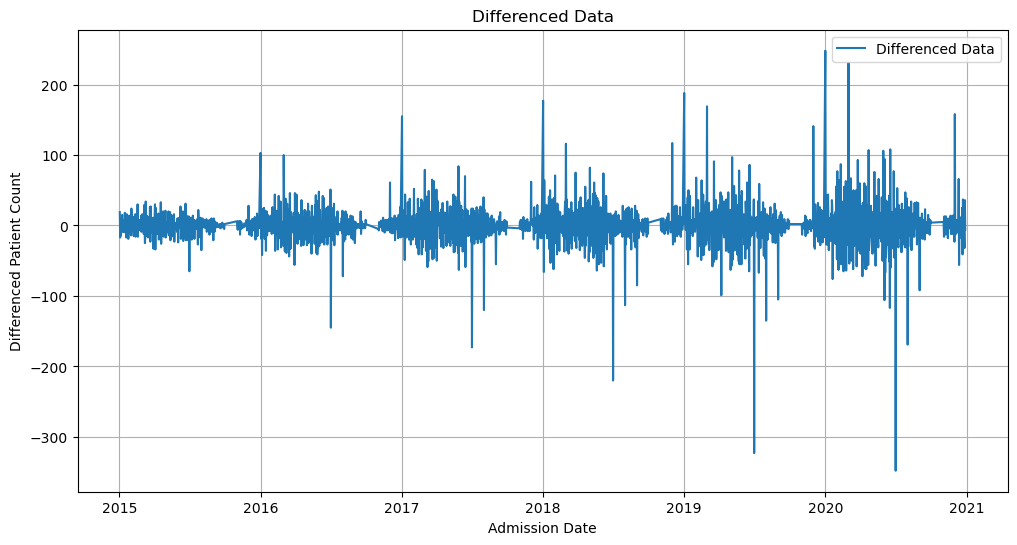

In [66]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# ALl Data
data = data
data_diff = data.groupby('Admission Date')['Patient ID'].count().reset_index()
data_diff.columns = ['Admission Date', 'Patient Count']
data_diff_copy = data_diff

# Perform differencing to make the data stationary
data_diff['Patient Count'] = data_diff['Patient Count'].diff()
data_diff = data_diff.dropna()  # Drop the first row with NaN value

# ADF test for stationarity
result = adfuller(data_diff['Patient Count'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Create a line graph for the differenced data
plt.figure(figsize=(12, 6))
plt.plot(data_diff['Admission Date'], data_diff['Patient Count'], label='Differenced Data')
plt.xlabel('Admission Date')
plt.ylabel('Differenced Patient Count')
plt.title('Differenced Data')
plt.legend()
plt.grid(True)
plt.show()


In [83]:
data_diff.to_csv('data_diff.csv')

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


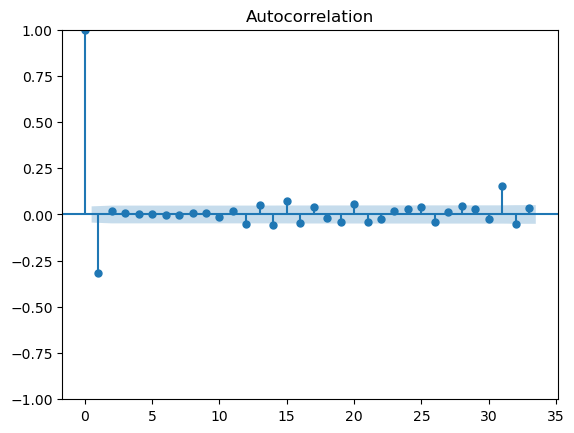

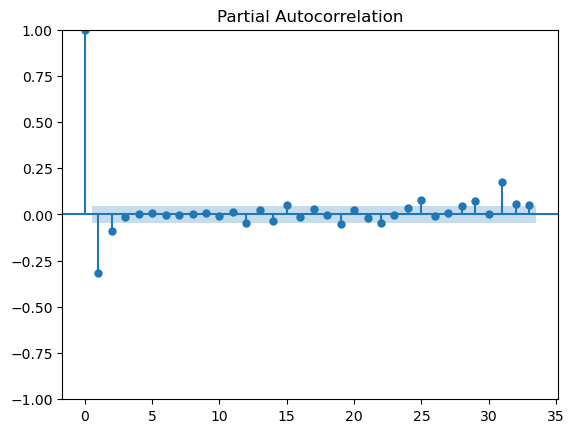

In [34]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_diff['Patient Count'])
plot_pacf(data_diff['Patient Count'])
plt.show()

In [87]:
from statsmodels.tsa.arima.model import ARIMA

# Define the order of the ARIMA model (p, d, q)
p, d, q = 1,1,1  # Replace with your selected values

model = ARIMA(data_diff['Patient Count'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          Patient Count   No. Observations:                 1987
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9475.170
Date:                Thu, 26 Oct 2023   AIC                          18956.340
Time:                        23:08:15   BIC                          18973.122
Sample:                             0   HQIC                         18962.504
                               - 1987                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3153      0.011    -28.876      0.000      -0.337      -0.294
ma.L1         -1.0000      0.121     -8.255      0.000      -1.237      -0.763
sigma2       812.4733     99.006      8.206      0.0

In [88]:
# Make predictions
forecast_steps = 10  # Replace with the number of steps you want to forecast
predictions = model_fit.forecast(steps=forecast_steps)
predictions

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1987    2.000854
1988   -0.521762
1989    0.273602
1990    0.022829
1991    0.101896
1992    0.076967
1993    0.084827
1994    0.082349
1995    0.083130
1996    0.082884
Name: predicted_mean, dtype: float64

In [97]:
original_forecasts = predictions.cumsum()

In [99]:
# Assuming your original dataset is stored in the variable 'data'
last_known_value = data_diff_copy['Patient Count'].iloc[-1]
original_forecasts += last_known_value

In [100]:
original_forecasts

1987   -3.999146
1988   -4.520908
1989   -4.247306
1990   -4.224476
1991   -4.122580
1992   -4.045613
1993   -3.960786
1994   -3.878438
1995   -3.795307
1996   -3.712424
Name: predicted_mean, dtype: float64

In [92]:
# Make predictions in differenced values
forecast_steps = 20
differenced_predictions = model_fit.forecast(steps=forecast_steps)

# Calculate cumulative sum to reverse the differencing
original_forecasts = differenced_predictions.cumsum()

# If you initially differenced your data, add the last known value
last_known_value = data_diff_copy['Patient Count'].iloc[-1]
original_forecasts += last_known_value


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


C:\Users\krishika.R\AppData\Local\Temp\ipykernel_18320\814274349.py:11: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=last_date, periods=forecast_steps, freq=frequency, closed='right')


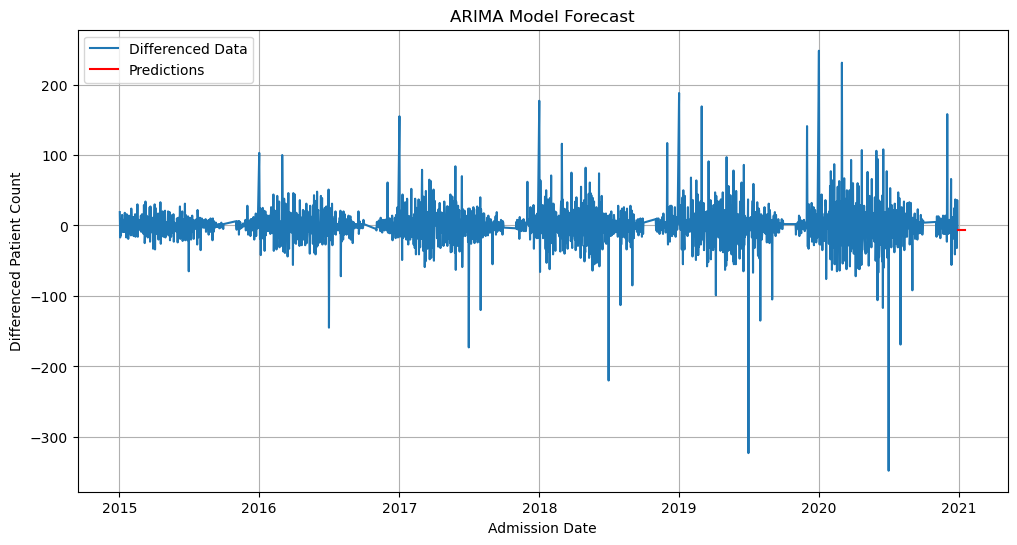

In [85]:
# Define the last date in your historical data
last_date = pd.to_datetime('2020-12-28')  # Replace with your actual last date

# Define the number of future periods you want to forecast
forecast_steps = 21  # Replace with the desired number of steps

# Define the frequency of your time series (e.g., 'D' for daily, 'M' for monthly)
frequency = 'D'  # Replace with the appropriate frequency

# Create a date range for the future dates
future_dates = pd.date_range(start=last_date, periods=forecast_steps, freq=frequency, closed='right')

plt.figure(figsize=(12, 6))
plt.plot(data_diff['Admission Date'], data_diff['Patient Count'], label='Differenced Data')
plt.plot(future_dates, predictions, label='Predictions', color='red')
plt.xlabel('Admission Date')
plt.ylabel('Differenced Patient Count')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
future_dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09'],
              dtype='datetime64[ns]', freq='D')

KeyError: 0

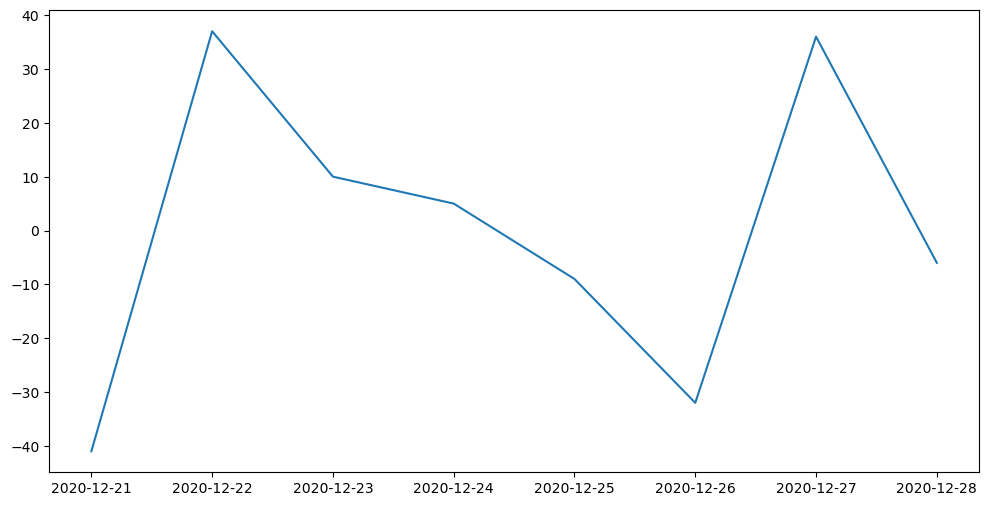

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your dataset contains a column named 'Admission Date' and 'Patient Count'
# Select the last week of your dataset
last_week = data_diff[data_diff['Admission Date'] >= data_diff['Admission Date'].max() - pd.DateOffset(weeks=1)]

# Plot the last week of your dataset and future dates
plt.figure(figsize=(12, 6))

# Plot the last week of the dataset
plt.plot(last_week['Admission Date'], last_week['Patient Count'], label='Last Week Data')

# Plot future dates
plt.plot([last_week['Admission Date'].iloc[-1], future_dates[0]], [last_week['Patient Count'].iloc[-1], predictions[0]], label='Predictions', color='red', linestyle='--')
plt.plot(future_dates[1:], predictions[1:], linestyle='--', color='red')

plt.xlabel('Admission Date')
plt.ylabel('Patient Count')
plt.title('Last Week of Dataset and Future Dates')
plt.legend()
plt.grid(True)
plt.show()


## To Be Worked On

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

datasets = {
    "All Data": data_X['Patient Count'],
    "Train Data": train_dataset['Patient Count'],
    "Validation Data": validation_dataset['Patient Count'],
    "Test Data": test_dataset['Patient Count']
}

# Create a grid of ACF and PACF plots
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

for i, (data_label, data) in enumerate(datasets.items()):
    # ACF plot
    ax1 = axes[i, 0]
    plot_acf(data, lags=40, ax=ax1)
    ax1.set_title(f'ACF Plot - {data_label}')
    
    # PACF plot
    ax2 = axes[i, 1]
    plot_pacf(data, lags=40, ax=ax2)
    ax2.set_title(f'PACF Plot - {data_label}')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from itertools import product

# Extract the "Admission Date" and "Patient ID" columns
data = train_data

# Define a range of p, d, q, P, D, and Q values to search over
p_values = range(0, 3)  # Example range, adjust as needed
d_values = range(0, 2)  # Example range, adjust as needed
q_values = range(0, 3)  # Example range, adjust as needed
P_values = range(0, 3)  # Example range, adjust as needed
D_values = range(0, 2)  # Example range, adjust as needed
Q_values = range(0, 3)  # Example range, adjust as needed

best_order = None
best_seasonal_order = None
best_aic = np.inf

# Perform a grid search over the parameter space
for p, d, q, P, D, Q in product(p_values, d_values, q_values, P_values, D_values, Q_values):
    seasonal_order = (P, D, Q, 12)  # Adjust the seasonality (12 for monthly data)
    try:
        model = sm.tsa.SARIMAX(data['Patient ID'], order=(p, d, q), seasonal_order=seasonal_order)
        results = model.fit(disp=False)
        if results.aic < best_aic:
            best_order = (p, d, q)
            best_seasonal_order = seasonal_order
            best_aic = results.aic
    except:
        continue

print(f"Best SARIMAX Order: {best_order}")
print(f"Best Seasonal Order: {best_seasonal_order}")
print(f"Best AIC: {best_aic}")


In [ ]:
# SARIMAX Model
#exog = ...  # Define your exogenous variables (if any)
sarimax_model = SARIMAX(train_data['Patient ID'], order=(1, 1, 0), seasonal_order=(1, 1, 1, 12))
sarimax_results = sarimax_model.fit()

In [ ]:
# Evaluate the models
test_data['Lag1'] = test_data['Patient ID'].shift(1)
test_data.dropna(inplace=True)
X_test = test_data[['Lag1']]
y_test = test_data['Patient ID']

# SARIMAX predictions
sarimax_preds = sarimax_results.get_forecast(steps=len(test_data), exog=exog)
sarimax_pred_values = sarimax_preds.predicted_mean

# Calculate RMSE for both models
sarimax_rmse = np.sqrt(mean_squared_error(y_test, sarimax_pred_values))

print(f"SARIMAX RMSE: {sarimax_rmse}")


# Plot the predicted vs. actual values for one of the models
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, sarimax_pred_values, label='SARIMAX Predicted')
plt.xlabel("Date")
plt.ylabel("Count of Patients")
plt.title("SARIMAX vs. Actual")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Load the data from your CSV file (replace 'your_data_file.csv' with your actual file path)
df = pd.read_csv('data_2015_to_2020_scaling_with_end_date_mode_of_arrival_disposition.csv')

# Convert "Admission Date" column to datetime
df['Admission Date'] = pd.to_datetime(df['Admission Date'])

# Extract the "Admission Date" and "Patient ID" columns
data = df[['Admission Date', 'Patient ID']]

# Split the data into training and testing sets (adjust the split ratio as needed)
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# SARIMAX Model
#exog = ...  # Define your exogenous variables (if any)
sarimax_model = SARIMAX(train_data['Patient ID'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_results = sarimax_model.fit()

# Regression-Based Model (Random Forest, for example)
# Create lag features (previous time steps) as predictors
train_data['Lag1'] = train_data['Patient ID'].shift(1)
train_data.dropna(inplace=True)
X_train = train_data[['Lag1']]
y_train = train_data['Patient ID']

# Train the regression model
regression_model = RandomForestRegressor(n_estimators=100, random_state=42)
regression_model.fit(X_train, y_train)

# Evaluate the models
test_data['Lag1'] = test_data['Patient ID'].shift(1)
test_data.dropna(inplace=True)
X_test = test_data[['Lag1']]
y_test = test_data['Patient ID']

# SARIMAX predictions
sarimax_preds = sarimax_results.get_forecast(steps=len(test_data), exog=exog)
sarimax_pred_values = sarimax_preds.predicted_mean

# Regression-based model predictions
regression_pred_values = regression_model.predict(X_test)

# Calculate RMSE for both models
sarimax_rmse = np.sqrt(mean_squared_error(y_test, sarimax_pred_values))
regression_rmse = np.sqrt(mean_squared_error(y_test, regression_pred_values))

print(f"SARIMAX RMSE: {sarimax_rmse}")
print(f"Regression RMSE: {regression_rmse}")

# Plot the predicted vs. actual values for one of the models
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, sarimax_pred_values, label='SARIMAX Predicted')
plt.xlabel("Date")
plt.ylabel("Count of Patients")
plt.title("SARIMAX vs. Actual")
plt.legend()
plt.grid(True)
plt.show()